In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from Data_pipeline import data_pipeline_url
from Data_pipeline import data_pipeline_api

In [26]:
#Daten einlesen
df_erdbeben = gpd.read_file("erdbeben.json")

In [27]:
print(df_erdbeben.head())

           id   mag                           place           time  \
0  ok2022fsoi  2.14      8 km SSE of Meno, Oklahoma  1648020119195   
1  hv72959742  2.24  16 km S of Fern Forest, Hawaii  1648019829910   
2  nc73709176  0.67      4km NNW of The Geysers, CA  1648019657830   
3  hv72959727  2.27      9 km ENE of Pāhala, Hawaii  1648018848890   
4  hv72959722  2.04       8 km NE of Pāhala, Hawaii  1648018716420   

         updated    tz                                                url  \
0  1648020344741  None  https://earthquake.usgs.gov/earthquakes/eventp...   
1  1648020159470  None  https://earthquake.usgs.gov/earthquakes/eventp...   
2  1648019755019  None  https://earthquake.usgs.gov/earthquakes/eventp...   
3  1648019178220  None  https://earthquake.usgs.gov/earthquakes/eventp...   
4  1648018905350  None  https://earthquake.usgs.gov/earthquakes/eventp...   

                                              detail  felt  cdi  ...  sources  \
0  https://earthquake.usgs.gov/eart

In [28]:
df_erdbeben.isna().sum()

id             0
mag            0
place          0
time           0
updated        0
tz          1994
url            0
detail         0
felt        1818
cdi         1818
mmi         1966
alert       1984
status         0
tsunami        0
sig            0
net            0
code           0
ids            0
sources        0
types          0
nst          480
dmin         633
rms            0
gap          267
magType        0
type           0
title          0
geometry       0
dtype: int64

In [29]:
for i in range(len(df_erdbeben)):
    if df_erdbeben["alert"][i] != None:
        print(df_erdbeben["alert"][i])

green
green
green
green
green
green
yellow
green
orange
green


In [30]:
df_erdbeben.dtypes

id            object
mag          float64
place         object
time           int64
updated        int64
tz            object
url           object
detail        object
felt         float64
cdi          float64
mmi          float64
alert         object
status        object
tsunami        int64
sig            int64
net           object
code          object
ids           object
sources       object
types         object
nst          float64
dmin         float64
rms          float64
gap          float64
magType       object
type          object
title         object
geometry    geometry
dtype: object

In [31]:
df_erdbeben.duplicated().sum()

0

In [32]:
df_erdbeben = df_erdbeben.drop(columns=["url", "detail"])

In [33]:
df_erdbeben_factor = df_erdbeben.astype({"type": "category", "alert": "category", "magType": "category", "sources": "category", "tsunami":"category"})

In [34]:
df_erdbeben_factor["tsunami"]

0       0
1       0
2       0
3       0
4       0
       ..
1989    0
1990    0
1991    0
1992    0
1993    0
Name: tsunami, Length: 1994, dtype: category
Categories (2, int64): [0, 1]

In [35]:
df_erdbeben_factor.describe()

,mag,time,updated,felt,cdi,mmi,sig,nst,dmin,rms,gap
count,1994.000000,1.994000e+03,1.994000e+03,176.000000,176.000000,28.000000,1994.000000,1514.000000,1361.000000,1994.000000,1727.000000
mean,1.673862,1.647714e+12,1.647761e+12,23.289773,2.601705,4.067464,67.695587,20.522457,0.586449,0.253422,122.203205
std,1.238916,1.740024e+08,1.778807e+08,111.178986,1.424940,2.169704,103.762679,17.872792,2.253934,0.284587,66.243840
min,-1.360000,1.647416e+12,1.647417e+12,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,18.000000
25%,0.850000,1.647567e+12,1.647612e+12,1.000000,2.000000,2.781000,11.000000,8.000000,0.017250,0.073050,72.000000
50%,1.465000,1.647698e+12,1.647793e+12,2.000000,2.200000,4.008500,33.000000,15.000000,0.054230,0.130000,106.000000
75%,2.120000,1.647874e+12,1.647908e+12,5.000000,3.400000,5.571500,70.000000,27.000000,0.155400,0.297500,161.000000
max,7.300000,1.648020e+12,1.648021e+12,984.000000,8.600000,8.008000,1301.000000,198.000000,45.917000,2.330000,351.000000


In [36]:
df_erdbeben_factor["date"]=0
df_erdbeben_factor["depth"]=0

In [37]:
for i in range(len(df_erdbeben_factor)):
    df_erdbeben_factor["date"][i] = datetime.datetime.fromtimestamp(df_erdbeben_factor["time"][i] / 1000).strftime('%d/%m/%y %H:%M:%S')
    df_erdbeben_factor["depth"][i] = df_erdbeben_factor["geometry"][i].z

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1150/2326743471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erdbeben_factor["date"][i] = datetime.datetime.fromtimestamp(df_erdbeben_factor["time"][i] / 1000).strftime('%d/%m/%y %H:%M:%S')
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1150/2326743471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

In [38]:
df_erdbeben_factor.head()

,id,mag,place,time,updated,tz,felt,cdi,mmi,alert,...,nst,dmin,rms,gap,magType,type,title,geometry,date,depth
0,ok2022fsoi,2.14,"8 km SSE of Meno, Oklahoma",1648020119195,1648020344741,None,NaN,NaN,NaN,NaN,...,38.0,0.221780,0.588481,65.595261,ml,earthquake,"M 2.1 - 8 km SSE of Meno, Oklahoma",POINT Z (-98.13358 36.31862 2.74982),23/03/22 08:21:59,2
1,hv72959742,2.24,"16 km S of Fern Forest, Hawaii",1648019829910,1648020159470,None,NaN,NaN,NaN,NaN,...,39.0,NaN,0.180000,158.000000,ml,earthquake,"M 2.2 - 16 km S of Fern Forest, Hawaii",POINT Z (-155.11250 19.32050 5.41000),23/03/22 08:17:09,5
2,nc73709176,0.67,"4km NNW of The Geysers, CA",1648019657830,1648019755019,None,NaN,NaN,NaN,NaN,...,10.0,0.007653,0.010000,67.000000,md,earthquake,"M 0.7 - 4km NNW of The Geysers, CA",POINT Z (-122.77934 38.80567 2.21000),23/03/22 08:14:17,2
3,hv72959727,2.27,"9 km ENE of Pāhala, Hawaii",1648018848890,1648019178220,None,NaN,NaN,NaN,NaN,...,43.0,NaN,0.120000,133.000000,ml,earthquake,"M 2.3 - 9 km ENE of Pāhala, Hawaii",POINT Z (-155.40350 19.24350 32.26000),23/03/22 08:00:48,32
4,hv72959722,2.04,"8 km NE of Pāhala, Hawaii",1648018716420,1648018905350,None,NaN,NaN,NaN,NaN,...,29.0,NaN,0.110000,129.000000,md,earthquake,"M 2.0 - 8 km NE of Pāhala, Hawaii",POINT Z (-155.41167 19.24950 32.39000),23/03/22 07:58:36,32


In [39]:
df_erdbeben_factor.describe()

,mag,time,updated,felt,cdi,mmi,sig,nst,dmin,rms,gap,depth
count,1994.000000,1.994000e+03,1.994000e+03,176.000000,176.000000,28.000000,1994.000000,1514.000000,1361.000000,1994.000000,1727.000000,1994.000000
mean,1.673862,1.647714e+12,1.647761e+12,23.289773,2.601705,4.067464,67.695587,20.522457,0.586449,0.253422,122.203205,19.812939
std,1.238916,1.740024e+08,1.778807e+08,111.178986,1.424940,2.169704,103.762679,17.872792,2.253934,0.284587,66.243840,48.987353
min,-1.360000,1.647416e+12,1.647417e+12,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,18.000000,-3.000000
25%,0.850000,1.647567e+12,1.647612e+12,1.000000,2.000000,2.781000,11.000000,8.000000,0.017250,0.073050,72.000000,2.000000
50%,1.465000,1.647698e+12,1.647793e+12,2.000000,2.200000,4.008500,33.000000,15.000000,0.054230,0.130000,106.000000,7.000000
75%,2.120000,1.647874e+12,1.647908e+12,5.000000,3.400000,5.571500,70.000000,27.000000,0.155400,0.297500,161.000000,15.000000
max,7.300000,1.648020e+12,1.648021e+12,984.000000,8.600000,8.008000,1301.000000,198.000000,45.917000,2.330000,351.000000,616.000000


In [40]:
koordinaten_check = gpd.GeoSeries(df_erdbeben_factor["geometry"])

In [41]:
koordinaten_check.is_valid.sum()

1994

In [42]:
#check if mag < 0
invalid_mag = df_erdbeben_factor[df_erdbeben_factor["mag"] < -1]
print(invalid_mag)

              id   mag                           place           time  \
650   av91052298 -1.07    81 km W of Salamatof, Alaska  1647822313540   
1505  uu60486192 -1.36   48 km SSE of Mammoth, Wyoming  1647563366660   
1540  av91515366 -1.09  61 km ENE of Pedro Bay, Alaska  1647553100110   

            updated    tz  felt  cdi  mmi alert  ...  nst     dmin   rms  \
650   1647997623130  None   NaN  NaN  NaN   NaN  ...  4.0      NaN  0.04   
1505  1647617792210  None   NaN  NaN  NaN   NaN  ...  5.0  0.03382  0.06   
1540  1647636633840  None   NaN  NaN  NaN   NaN  ...  4.0      NaN  0.04   

        gap magType        type                                    title  \
650   128.0      ml  earthquake    M -1.1 - 81 km W of Salamatof, Alaska   
1505  163.0      md  earthquake   M -1.4 - 48 km SSE of Mammoth, Wyoming   
1540  129.0      ml  earthquake  M -1.1 - 61 km ENE of Pedro Bay, Alaska   

                                   geometry               date  depth  
650   POINT Z (-152.80850

In [43]:
df_tsunami = df_erdbeben_factor[df_erdbeben_factor["tsunami"] == 1]
print(df_tsunami)

              id  mag                            place           time  \
151   us6000h6nr  6.7  62 km S of Hualien City, Taiwan  1647970898951   
163   us6000h6ne  6.7      northern Mid-Atlantic Ridge  1647966908020   
1917  us6000h519  7.3        57 km ENE of Namie, Japan  1647441393264   

            updated    tz   felt  cdi    mmi   alert  ... nst    dmin   rms  \
151   1648017030478  None  146.0  6.9  7.159   green  ... NaN   0.672  0.90   
163   1647977594913  None    0.0  1.0  0.000   green  ... NaN  10.749  0.76   
1917  1648011980128  None  350.0  8.6  8.008  orange  ... NaN   2.937  1.00   

       gap magType        type                                    title  \
151   35.0     mww  earthquake  M 6.7 - 62 km S of Hualien City, Taiwan   
163   27.0     mww  earthquake      M 6.7 - northern Mid-Atlantic Ridge   
1917  29.0     mww  earthquake        M 7.3 - 57 km ENE of Namie, Japan   

                                   geometry               date  depth  
151   POINT Z (12

<AxesSubplot:>

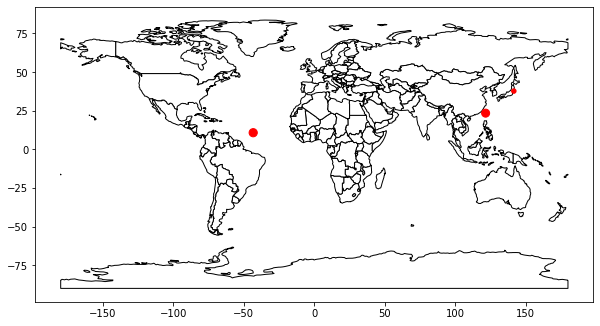

In [44]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
axis = world.plot(figsize=(10,10), color='white', edgecolor='black')

df_tsunami.plot(ax=axis, color="red", markersize=(df_erdbeben_factor["mag"]*30))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa850406580>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa850422310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa8504060a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa850422a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa850422dc0>],
 'means': []}

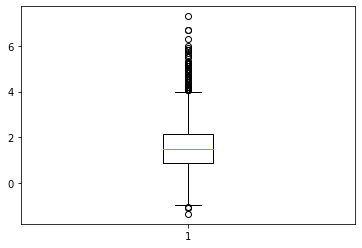

In [45]:
plt.boxplot(x=df_erdbeben_factor["mag"])

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Magnitude')

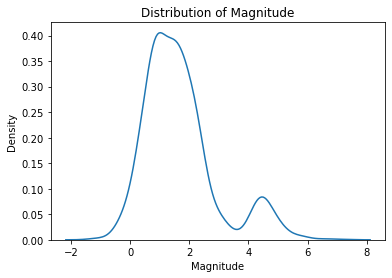

In [46]:
sns.distplot(df_erdbeben_factor["mag"], hist=False)
plt.xlabel("Magnitude")
plt.title("Distribution of Magnitude")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa87397e220>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa87397e940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa873972e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa8739860a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa873986430>],
 'means': []}

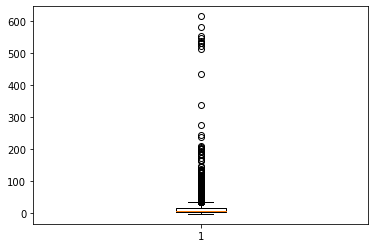

In [47]:
plt.boxplot(x=df_erdbeben_factor["depth"])

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of depth')

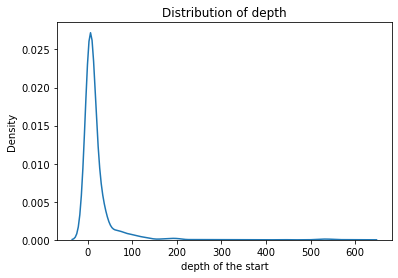

In [48]:
sns.distplot(df_erdbeben_factor["depth"], hist=False)
plt.xlabel("depth of the start")
plt.title("Distribution of depth")

In [49]:
df_erdbeben_factor["color"] = 0
for i in range(len(df_erdbeben_factor)):
    if df_erdbeben_factor["mag"][i] > 5:
        df_erdbeben_factor["color"][i] = "red"
    elif df_erdbeben_factor["mag"][i] > 3:
        df_erdbeben_factor["color"][i] = "orange"
    elif df_erdbeben_factor["mag"][i] > 1:
        df_erdbeben_factor["color"][i] = "yellow"
    else:
        df_erdbeben_factor["color"][i] = "green"

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1150/2877286564.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erdbeben_factor["color"][i] = "yellow"
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


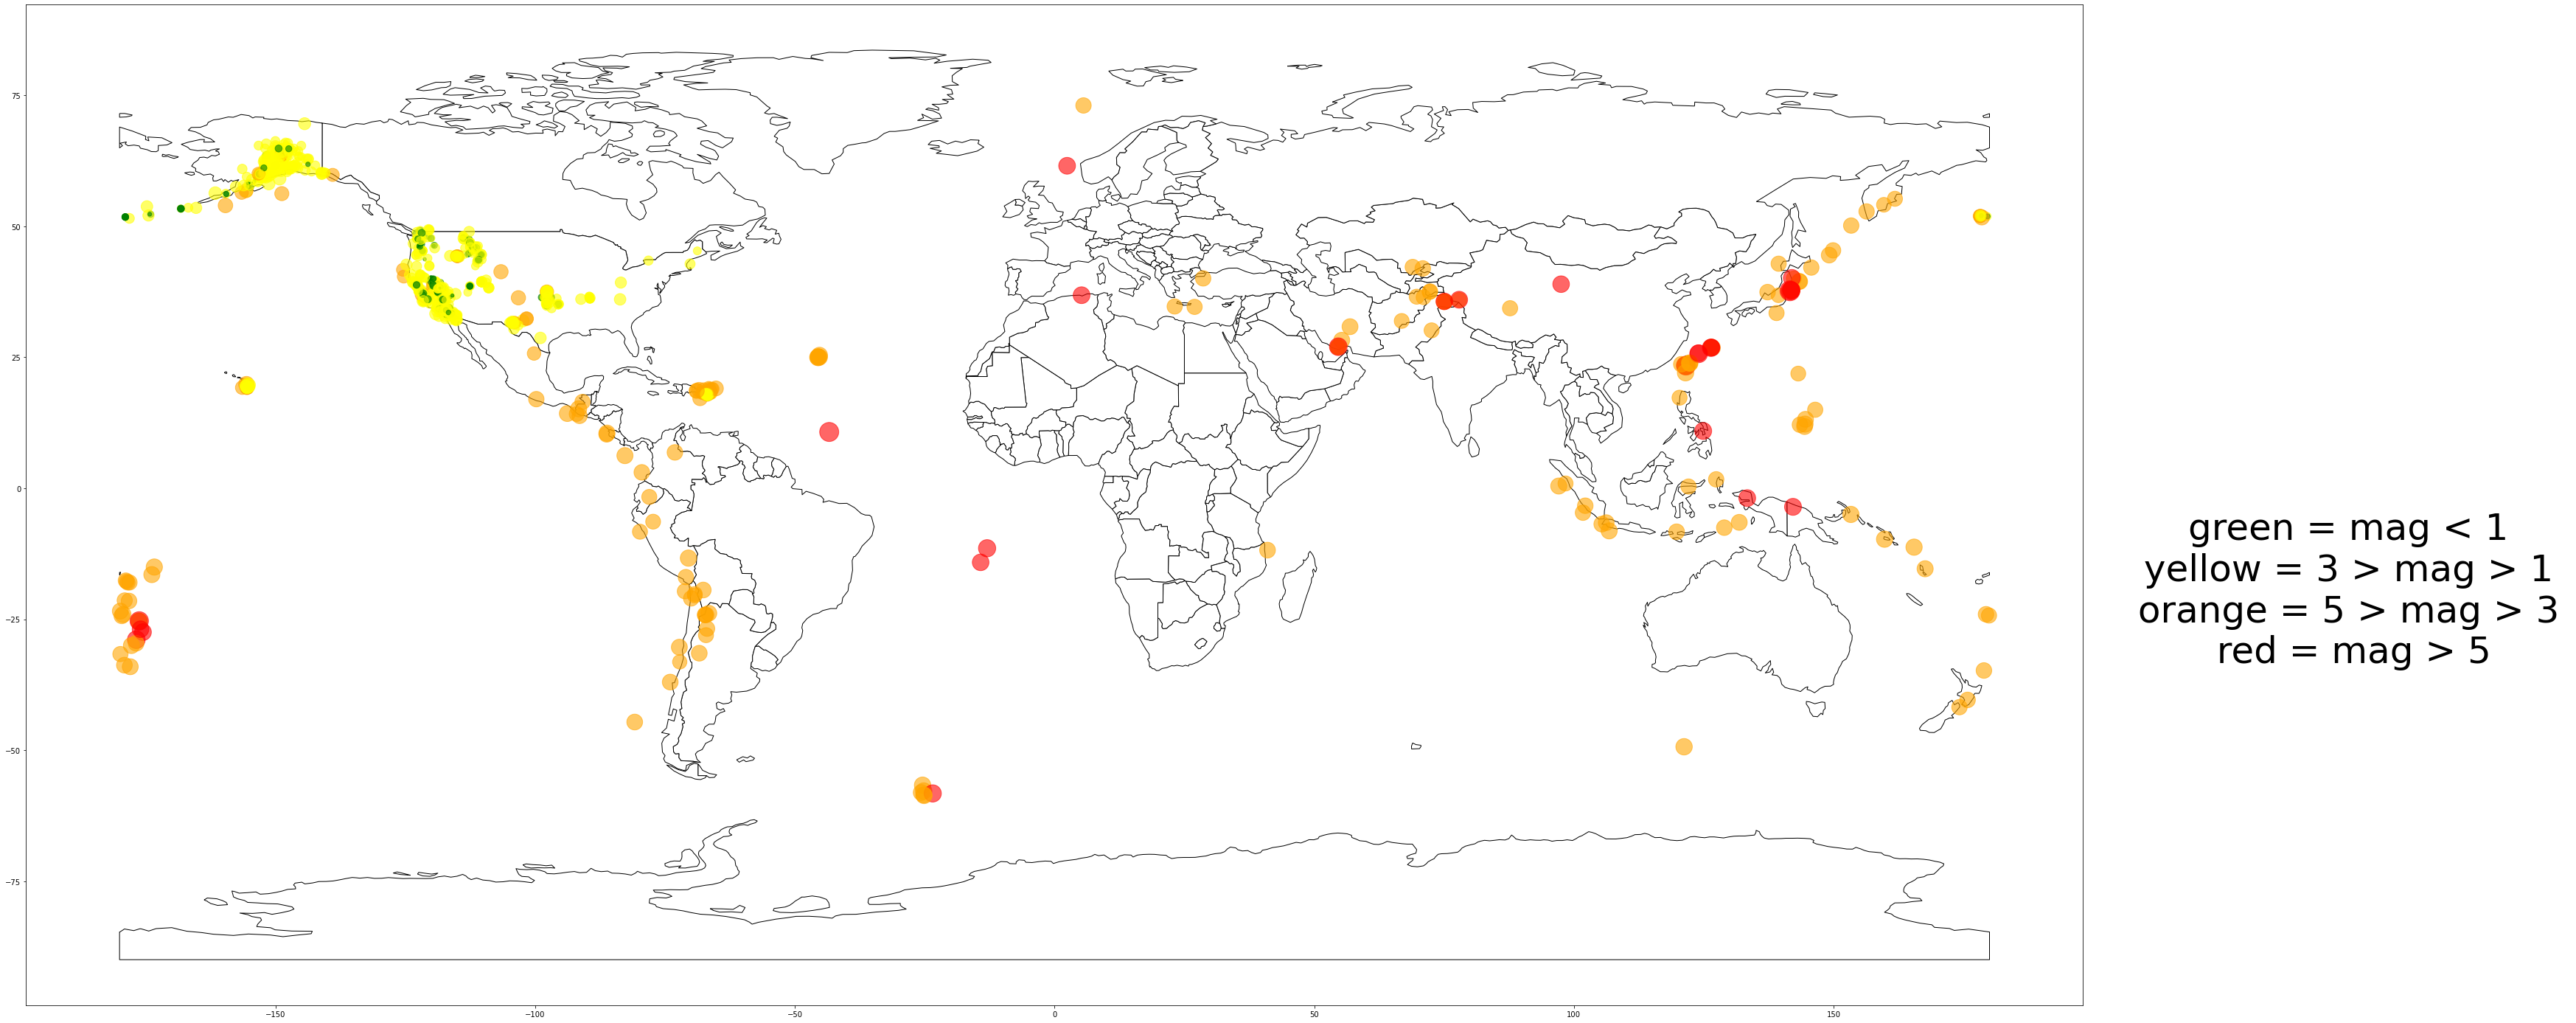

In [54]:
#Import world map from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
axis = world.plot(figsize=(50,50), color='white', edgecolor='black')

df_erdbeben_factor.plot(ax=axis, color=df_erdbeben_factor["color"], markersize=(df_erdbeben_factor["mag"]*100), alpha=0.6)
plt.suptitle("green = mag < 1\n yellow = 3 > mag > 1 \n orange = 5 > mag > 3 \n red = mag > 5", x=1, y=0.5, fontsize=50)
plt.show()

/Users/janisfrolich/PycharmProjects/daw/Erdbeben/Data_pipeline.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"][i] = datetime.datetime.fromtimestamp(df["time"][i] / 1000).strftime('%d/%m/%y %H:%M:%S')
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/janisfrolich/PycharmProjects/daw/Erdbeben/Data_pipeline.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

There are invalid magnitudes in the data.
              id   mag                           place           time  \
828   av91052898 -1.02     75 km WNW of Tyonek, Alaska  1648258050000   
2459  av91052298 -1.07    81 km W of Salamatof, Alaska  1647822313540   
3391  uu60486192 -1.36   48 km SSE of Mammoth, Wyoming  1647563366660   
3426  av91515366 -1.09  61 km ENE of Pedro Bay, Alaska  1647553100110   
4202  av91052123 -1.15  61 km ENE of Pedro Bay, Alaska  1647345397430   
5152  av91510166 -1.05  63 km ENE of Pedro Bay, Alaska  1647073895200   
5183  av91051738 -1.05        9 km W of Akutan, Alaska  1647061710190   
5235  av91509771 -1.16  60 km ENE of Pedro Bay, Alaska  1647045747050   
5682  av91508711 -1.01  61 km ENE of Pedro Bay, Alaska  1646914665090   
7242  av91051193 -1.04     14 km WSW of Akutan, Alaska  1646477052120   
8511  av91502541 -1.30  61 km ENE of Pedro Bay, Alaska  1646151429690   
8921  av91502086 -1.20  64 km ENE of Pedro Bay, Alaska  1646076269530   

        

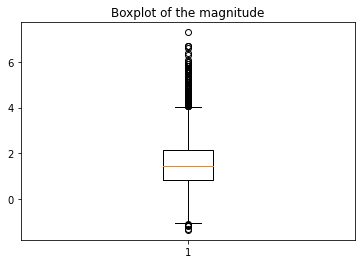

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


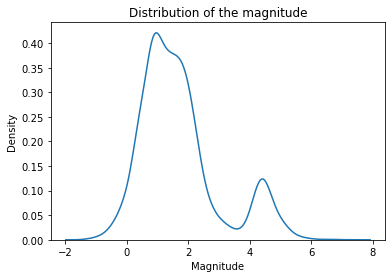

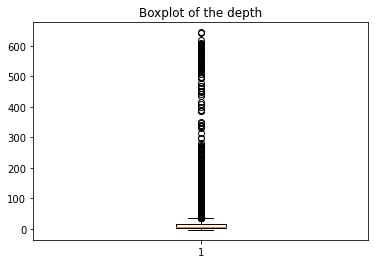

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


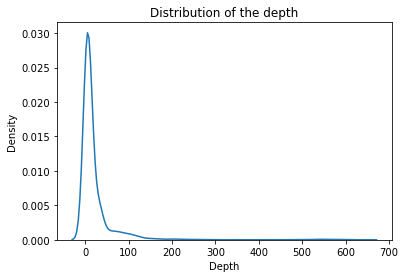

/Users/janisfrolich/PycharmProjects/daw/Erdbeben/Data_pipeline.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["color"][i] = "green"
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


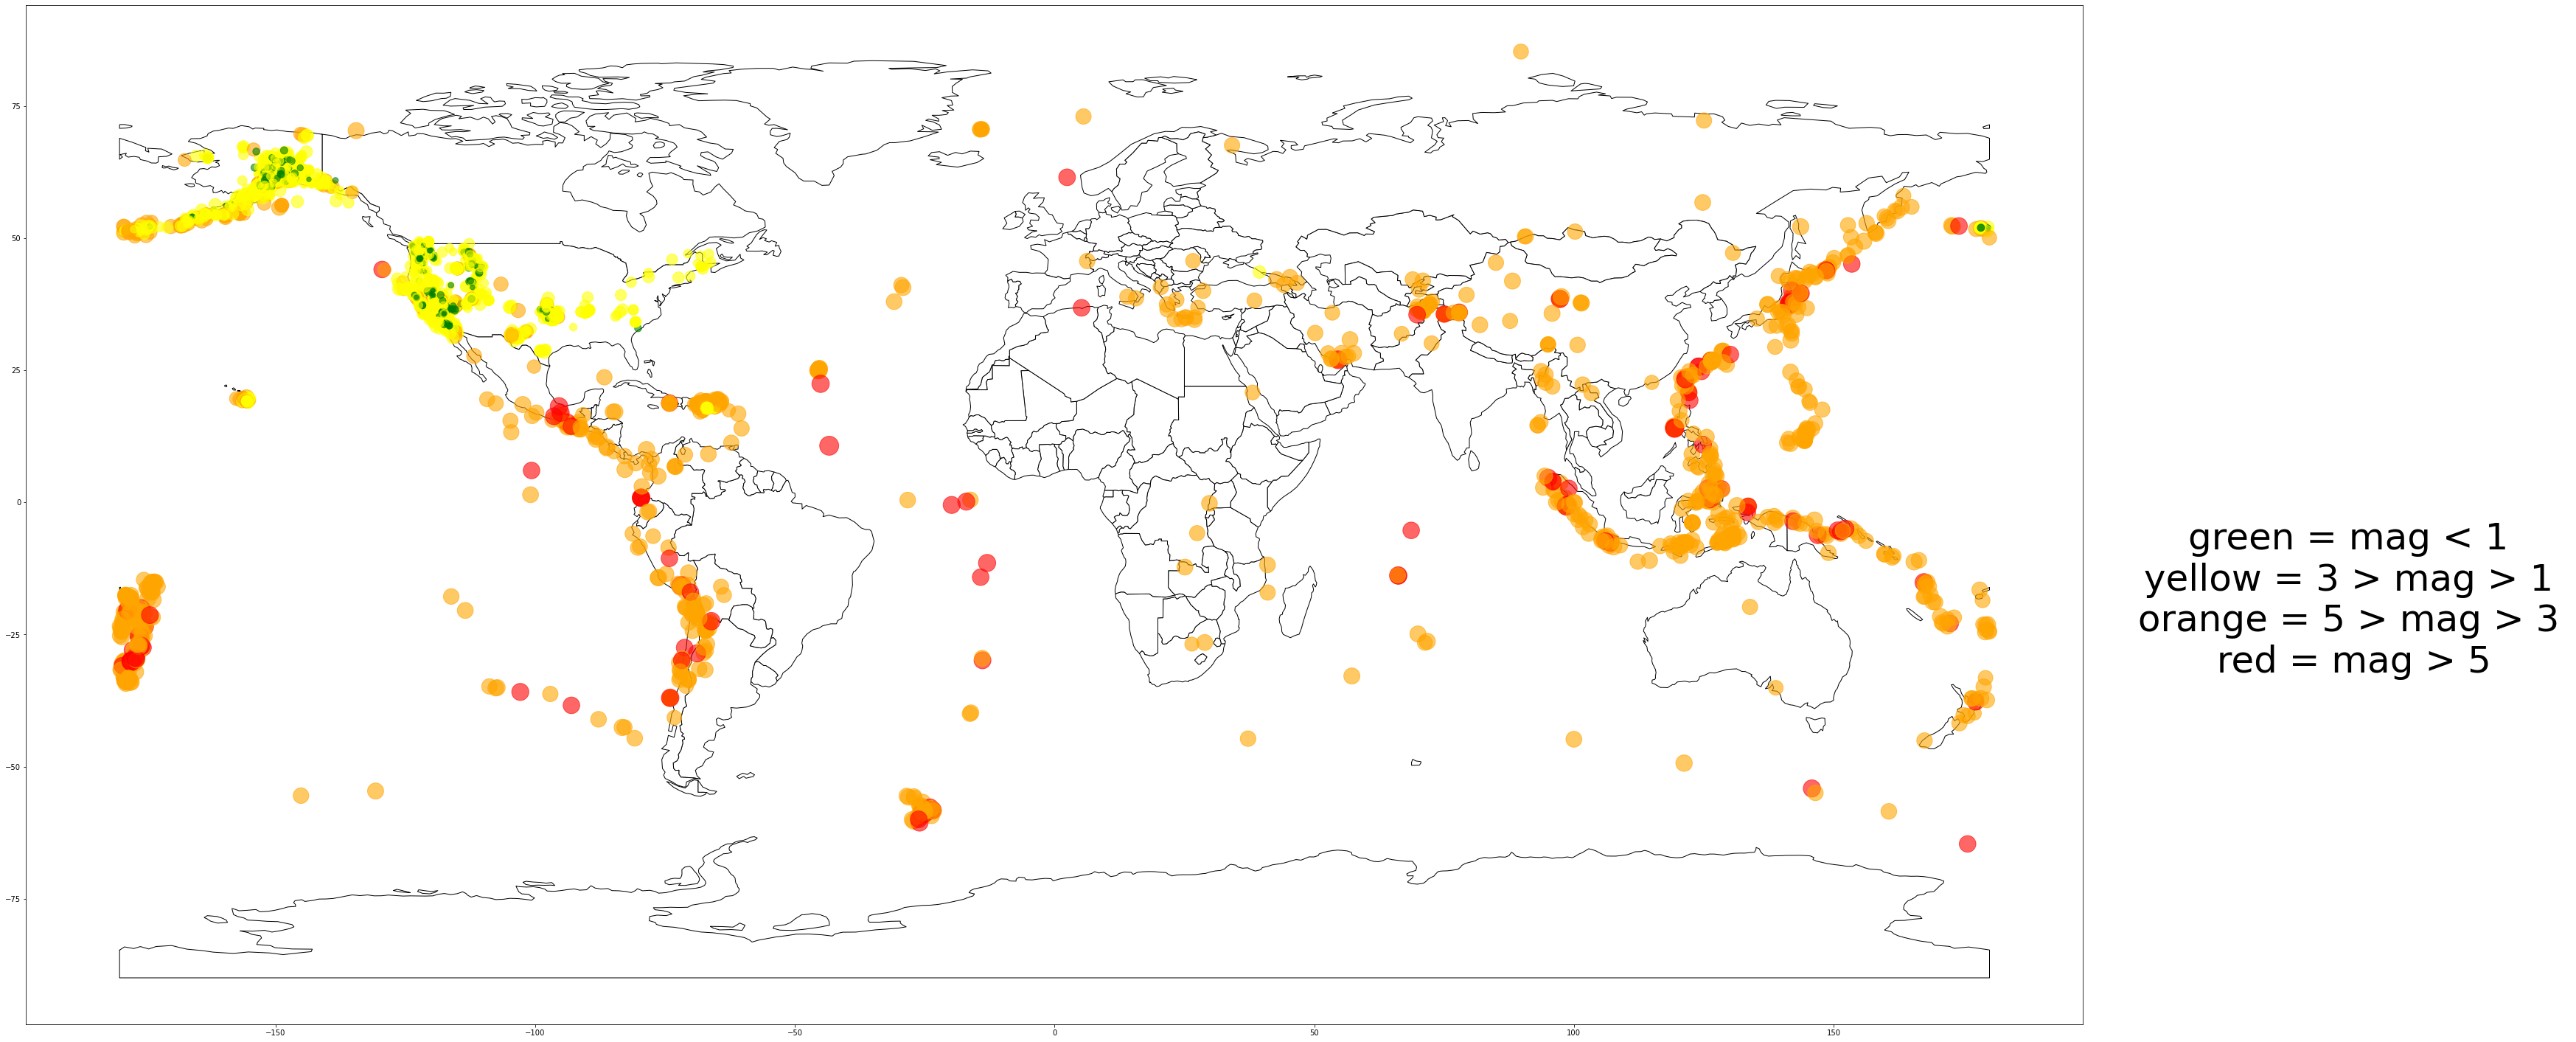

In [2]:
data_pipeline_url("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson")

/Users/janisfrolich/PycharmProjects/daw/Erdbeben/Data_pipeline.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_data(df_reshaped)
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/janisfrolich/PycharmProjects/daw/Erdbeben/Data_pipeline.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

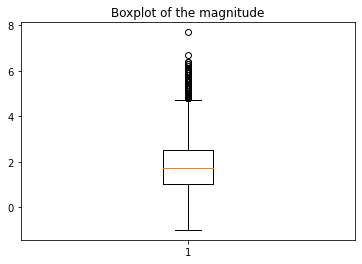

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


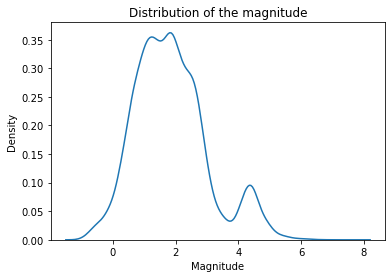

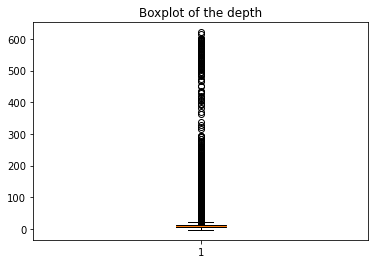

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


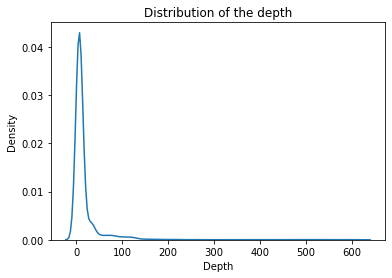

/Users/janisfrolich/PycharmProjects/daw/Erdbeben/Data_pipeline.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  print("There are invalid geometries in the data.")
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


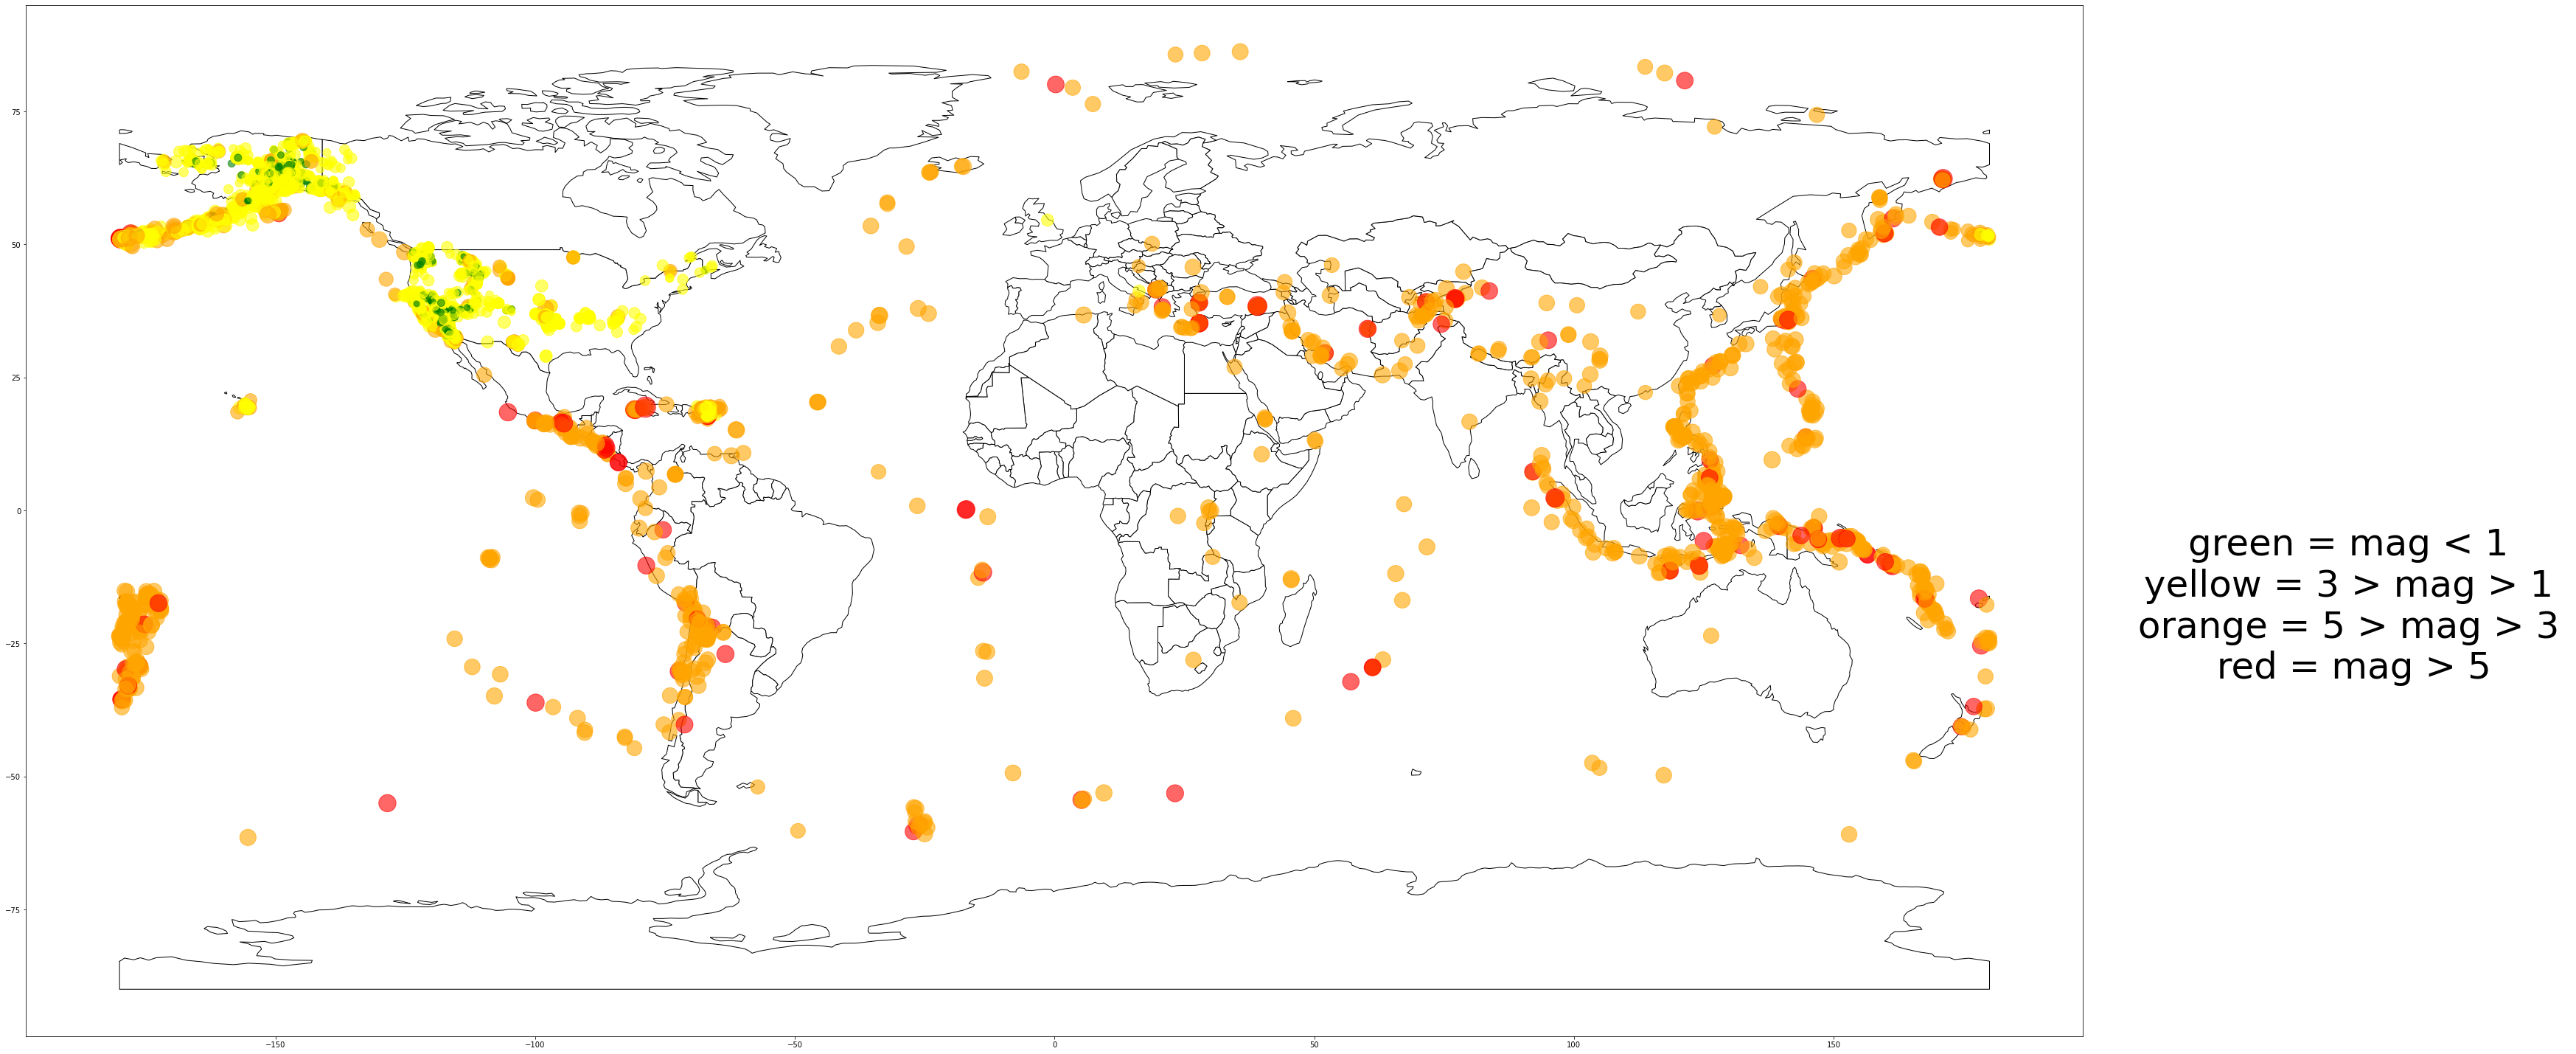

In [23]:
data_pipeline_api("2020-01-01", "2020-02-01")